In [3]:
import numpy as np   
import pandas as pd  
import chardet   
import string
from nltk.corpus import stopwords

In [4]:
file_path = 'spam.csv'
with open (file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(500000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7268495402843178, 'language': ''}


In [5]:
sms = pd.read_csv(file_path, encoding = "Windows-1252")

In [6]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
print(sms.v2[71])      
print(sms.v1[71])      

Finished class where are you.
ham


In [8]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
sms.dropna(how='any', inplace=True, axis=1)  #use 'sms_clean =' and change in-place to False, if you plan to use 'sms' later,
sms.columns=['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
print("Before Modification:\n") 
sms.head()

Before Modification:



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})  
print("After Modification:\n") 
sms.head()

After Modification:



,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
print("Before Modification:\n") 
sms.head()

Before Modification:



,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
sms['message_len'] = sms.message.apply(len)   
print("After Modification:\n") 
sms.head()

After Modification:



,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

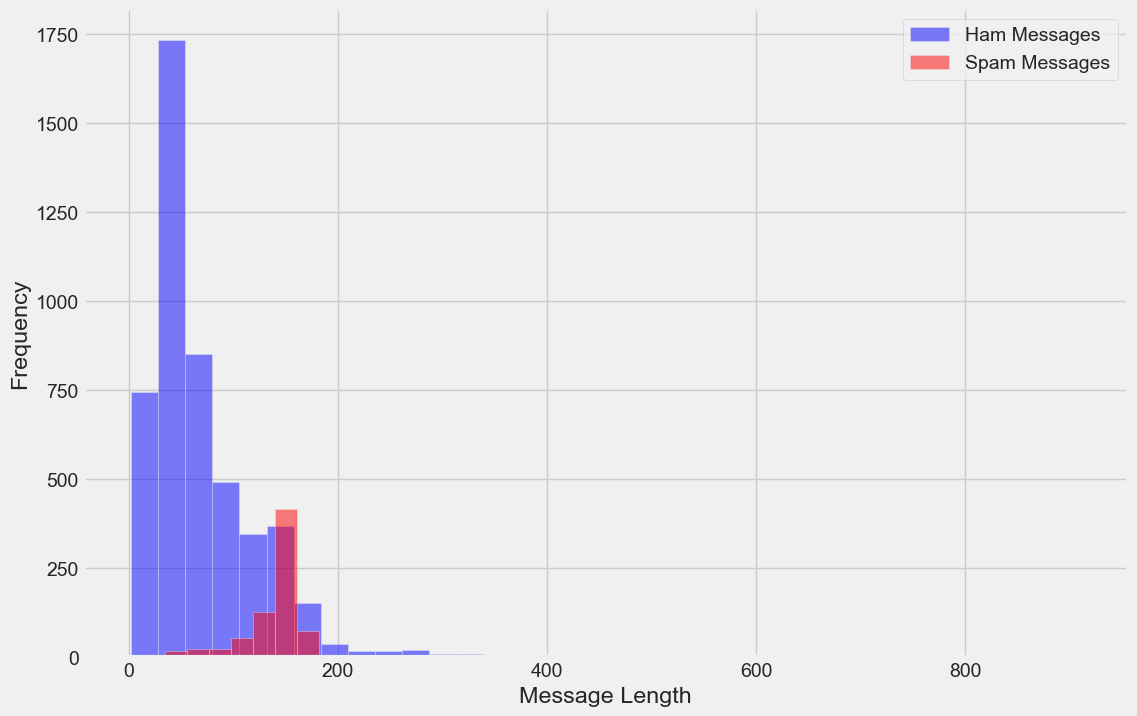

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns              

sns.set_style('whitegrid')          
plt.style.use('fivethirtyeight')   
plt.figure(figsize=(12,8))        

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham Messages', alpha=0.5)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam Messages', alpha=0.5)

plt.legend()
plt.xlabel("Message Length")

In [17]:
sms.describe()

,label_num,message_len
count,5572.000000,5572.000000
mean,0.134063,80.118808
std,0.340751,59.690841
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


In [18]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [19]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [20]:
def temp_process(msg):
    
    STOPWORDS = stopwords.words('english')                             
    nopunc = [char for char in msg if char not in string.punctuation] 
    nopunc = ''.join(nopunc)                                              
    nopunc = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])    
    return nopunc

In [21]:
print("Before Modification:\n") 
sms.head()

Before Modification:



,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [22]:
sms['clean_msg'] = sms.message.apply(temp_process)   
print("After Modification:\n") 
sms.head()

After Modification:



,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah dont think goes usf lives around though


In [23]:
h_words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])    #Save messages as lowercase list
h_words[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [24]:
from collections import Counter
ham_words = Counter()

for each_word in h_words:               
    ham_words.update(each_word)       
    
print(ham_words.most_common(50))     

[('u', 972), ('im', 449), ('2', 305), ('get', 303), ('ltgt', 276), ('ok', 272), ('dont', 257), ('go', 247), ('ur', 240), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('4', 168), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100)]


In [25]:
s_words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])    #Save messages as lowercase list
spam_words = Counter()
for each_word in s_words:              
    spam_words.update(each_word)      
    
print(spam_words.most_common(50))     

[('call', 347), ('free', 216), ('2', 173), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('4', 119), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30)]


In [26]:
X = sms.clean_msg    
y = sms.label_num    

print(X.shape)       
print(y.shape)       

(5572,)
(5572,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

In [28]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4179,) (1393,)
(4179,) (1393,)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer    

vect = CountVectorizer()                 
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)    

In [30]:
X_test_dtm = vect.transform(X_test)           

In [31]:
X_test_dtm

<1393x7935 sparse matrix of type '<class 'numpy.int64'>'
	with 10448 stored elements in Compressed Sparse Row format>

In [32]:
X_train_dtm

<4179x7935 sparse matrix of type '<class 'numpy.int64'>'
	with 35241 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.naive_bayes import MultinomialNB 

nb = MultinomialNB()         
nb.fit(X_train_dtm, y_train)  

MultinomialNB()

In [34]:
y_pred_class = nb.predict(X_test_dtm)     

y_pred_class

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
X_test[2:3]

/var/folders/b_/9rw5mf8944v4bpwyn_sjt_8h0000gn/T/ipykernel_10701/3131513211.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_test[2:3]


1044    know someone know fancies Call 09058097218 fin...
Name: clean_msg, dtype: object

In [36]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9798994974874372

In [37]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1196,    6],
       [  22,  169]])

In [38]:
X_test[y_pred_class > y_test]  

4700                                     liked new mobile
1505    Total video converter free download type googl...
4417                                        get free call
5044    sent JD Customer Service cum Accounts Executiv...
2418    Madamregret disturbancemight receive reference...
75                               waiting machan Call free
Name: clean_msg, dtype: object

In [39]:
X_test[y_pred_class < y_test]   

683     Hi Im sue 20 years old work lapdancer love sex...
3979                                   ringtoneking 84484
1268    U get 2 phone wanna chat 2 set meet Call 09096...
730     Email AlertFrom Jeri StewartSize 2KBSubject Lo...
2662    Hello darling today would love chat dont tell ...
4296    thesmszonecom lets send free anonymous masked ...
1468    Hi LUCY Hubby meetins day Fri B alone hotel U ...
787     Ever thought living good life perfect partner ...
4371    Ur balance å£600 Next question Complete landma...
1894    FreeMsg Hey U got 1 videopic fones reply WILD ...
2819    INTERFLORA åÒIts late order Interflora flowers...
1892    CALL 09090900040 LISTEN EXTREME DIRTY LIVE CHA...
3740                                         22 146tf150p
4211    Missed call alert numbers called left message ...
4796    Santa calling Would little ones like call Sant...
1874         Would like see XXX pics hot nearly banned uk
2963    ever notice youre driving anyone going slower ...
4674    Hi bab